In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set = pd.read_csv("./data/train.csv")
test_set = pd.read_csv("./data/test.csv")

In [3]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_set.shape

(1460, 81)

In [5]:
test_set.shape

(1459, 80)

In [6]:
all_X = pd.concat((train_set.loc[:, 'MSSubClass':'SaleCondition'],
                      test_set.loc[:, 'MSSubClass':'SaleCondition']))

In [7]:
all_X.shape

(2919, 79)

## feature normlization

In [8]:
numeric_feats = all_X.dtypes[all_X.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
all_X[numeric_feats] = all_X[numeric_feats].apply(lambda x: (x - x.mean())
                                                            / (x.std()))

In [10]:
all_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067320,RL,-0.184443,-0.217841,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.285886,-0.063139,NaN,NaN,NaN,-0.089577,-1.551918,0.157619,WD,Normal
1,-0.873466,RL,0.458096,-0.072032,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.285886,-0.063139,NaN,NaN,NaN,-0.089577,-0.446848,-0.602858,WD,Normal
2,0.067320,RL,-0.055935,0.137173,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.285886,-0.063139,NaN,NaN,NaN,-0.089577,1.026577,0.157619,WD,Normal
3,0.302516,RL,-0.398622,-0.078371,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.285886,-0.063139,NaN,NaN,NaN,-0.089577,-1.551918,-1.363335,WD,Abnorml
4,0.067320,RL,0.629439,0.518814,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.285886,-0.063139,NaN,NaN,NaN,-0.089577,2.131647,0.157619,WD,Normal


**现在把离散数据点转换成数值标签**

In [11]:
all_X = pd.get_dummies(all_X, dummy_na=True)

In [12]:
all_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0


**把缺失数据用本特征的平均值估计**

In [13]:
all_X = all_X.fillna(all_X.mean())

In [14]:
all_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0


In [15]:
num_train = train_set.shape[0]

X_train = all_X[:num_train].as_matrix()
X_test = all_X[num_train:].as_matrix()
y_train = train_set.SalePrice.as_matrix()

In [16]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [17]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

X_train = nd.array(X_train)
y_train = nd.array(y_train)
y_train.reshape((num_train, 1))

X_test = nd.array(X_test)

In [18]:
y_train


[ 208500.  181500.  223500. ...,  266500.  142125.  147500.]
<NDArray 1460 @cpu(0)>

**USE GPU**

In [19]:
import mxnet as mx

try:
    ctx = mx.gpu()
    _ = nd.zeros((1,), ctx=ctx)
except:
    ctx = mx.cpu()
ctx

gpu(0)

In [20]:
import mxnet as mx
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon
X_train = nd.array(X_train, ctx=ctx)
y_train = nd.array(y_train, ctx=ctx)
y_train = y_train.reshape((num_train, 1))

X_test = nd.array(X_test, ctx=ctx)

In [21]:
y_train


[[ 208500.]
 [ 181500.]
 [ 223500.]
 ..., 
 [ 266500.]
 [ 142125.]
 [ 147500.]]
<NDArray 1460x1 @gpu(0)>

In [22]:
y_train.shape

(1460, 1)

In [23]:
X_train


[[ 0.06731988 -0.18444261 -0.21784137 ...,  1.          0.          0.        ]
 [-0.87346637  0.45809588 -0.07203174 ...,  1.          0.          0.        ]
 [ 0.06731988 -0.05593492  0.13717337 ...,  1.          0.          0.        ]
 ..., 
 [ 0.30251643 -0.14160672 -0.14278111 ...,  1.          0.          0.        ]
 [-0.87346637 -0.05593492 -0.0571972  ...,  1.          0.          0.        ]
 [-0.87346637  0.24391638 -0.02930318 ...,  1.          0.          0.        ]]
<NDArray 1460x331 @gpu(0)>

In [24]:
square_loss = gluon.loss.L2Loss()

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [25]:
def get_rmse_log(net, X_train, y_train):
    num_train = X_train.shape[0]
    clipped_preds = nd.clip(net(X_train), 1, float('inf'))
    return np.sqrt(2 * nd.sum(square_loss(
        nd.log(clipped_preds), nd.log(y_train))).asscalar() / num_train)

In [26]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(net, X_train, y_train, X_test, y_test, epochs,
          verbose_epoch, learning_rate, weight_decay):
    train_loss = []
    if X_test is not None:
        test_loss = []
    batch_size = 100
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size,shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': learning_rate,
                             'wd': weight_decay})
    net.collect_params().initialize(ctx=ctx, force_reinit=True)
    for epoch in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)

            cur_train_loss = get_rmse_log(net, X_train, y_train)
        if epoch > verbose_epoch:
            print("Epoch %d, train loss: %f" % (epoch, cur_train_loss))
        train_loss.append(cur_train_loss)
        if X_test is not None:
            cur_test_loss = get_rmse_log(net, X_test, y_test)
            test_loss.append(cur_test_loss)
    plt.plot(train_loss)
    plt.legend(['train'])
    if X_test is not None:
        plt.plot(test_loss)
        plt.legend(['train','test'])
    plt.show()
    if X_test is not None:
        return cur_train_loss, cur_test_loss
    else:
        return cur_train_loss

In [27]:
def k_fold_cross_valid(k, epochs, verbose_epoch, X_train, y_train,
                       learning_rate, weight_decay):
    assert k > 1
    fold_size = X_train.shape[0] // k
    train_loss_sum = 0.0
    test_loss_sum = 0.0
    for test_i in range(k):
        X_val_test = X_train[test_i * fold_size: (test_i + 1) * fold_size, :]
        y_val_test = y_train[test_i * fold_size: (test_i + 1) * fold_size]

        val_train_defined = False
        for i in range(k):
            if i != test_i:
                X_cur_fold = X_train[i * fold_size: (i + 1) * fold_size, :]
                y_cur_fold = y_train[i * fold_size: (i + 1) * fold_size]
                if not val_train_defined:
                    X_val_train = X_cur_fold
                    y_val_train = y_cur_fold
                    val_train_defined = True
                else:
                    X_val_train = nd.concat(X_val_train, X_cur_fold, dim=0)
                    y_val_train = nd.concat(y_val_train, y_cur_fold, dim=0)
        net = get_net()
        train_loss, test_loss = train(
            net, X_val_train, y_val_train, X_val_test, y_val_test,
            epochs, verbose_epoch, learning_rate, weight_decay)
        train_loss_sum += train_loss
        print("Test loss: %f" % test_loss)
        test_loss_sum += test_loss
    return train_loss_sum / k, test_loss_sum / k

In [28]:
# 0.11952 for 256 hidden units
k = 5
epochs = 15
verbose_epoch = 10
learning_rate = 0.3
weight_decay = 120

In [29]:
# liner regression
def get_net():
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1200, activation="relu"))
        net.add(gluon.nn.Dropout(0.2))
        net.add(gluon.nn.Dense(1))
    net.initialize(ctx=ctx)
    return net

In [30]:
# 0.11661 for 1024 hidden units with 0.1 dropout
k = 5
epochs = 22
verbose_epoch = 15
learning_rate = 0.1
weight_decay = 270

Epoch 16, train loss: 0.114533
Epoch 17, train loss: 0.115577
Epoch 18, train loss: 0.112678
Epoch 19, train loss: 0.111109
Epoch 20, train loss: 0.109595
Epoch 21, train loss: 0.107708


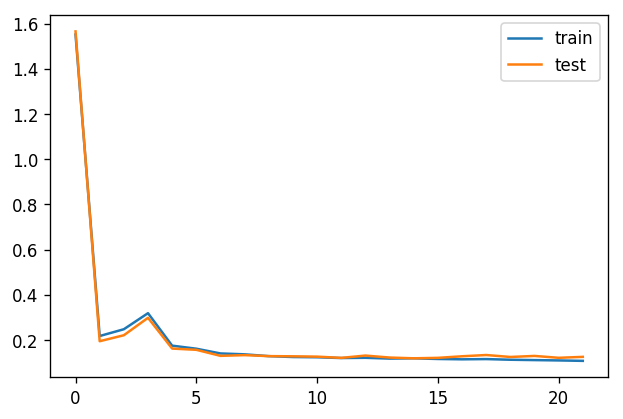

Test loss: 0.125396
Epoch 16, train loss: 0.109025
Epoch 17, train loss: 0.109096
Epoch 18, train loss: 0.107547
Epoch 19, train loss: 0.106633
Epoch 20, train loss: 0.105357
Epoch 21, train loss: 0.108400


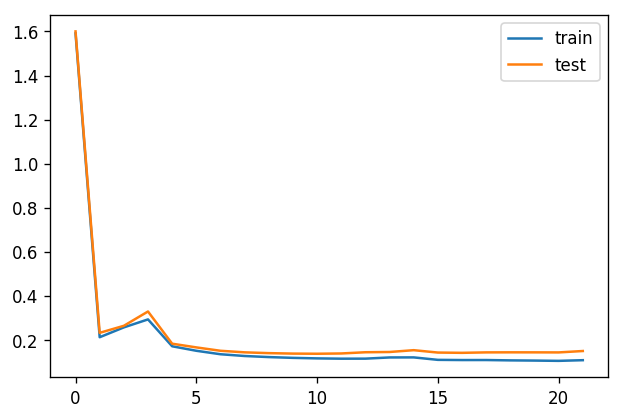

Test loss: 0.150007
Epoch 16, train loss: 0.110812
Epoch 17, train loss: 0.109268
Epoch 18, train loss: 0.111940
Epoch 19, train loss: 0.107504
Epoch 20, train loss: 0.105418
Epoch 21, train loss: 0.105694


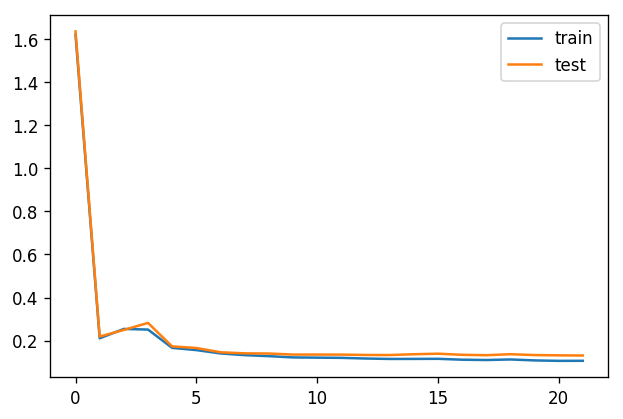

Test loss: 0.130276
Epoch 16, train loss: 0.117705
Epoch 17, train loss: 0.118165
Epoch 18, train loss: 0.114796
Epoch 19, train loss: 0.117348
Epoch 20, train loss: 0.119228
Epoch 21, train loss: 0.110745


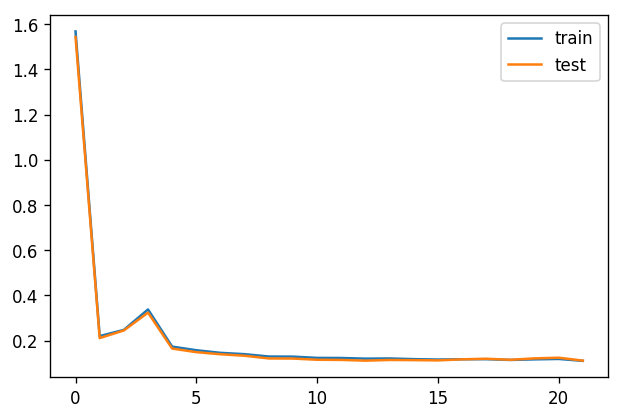

Test loss: 0.111764
Epoch 16, train loss: 0.106757
Epoch 17, train loss: 0.106559
Epoch 18, train loss: 0.104869
Epoch 19, train loss: 0.104808
Epoch 20, train loss: 0.104581
Epoch 21, train loss: 0.105369


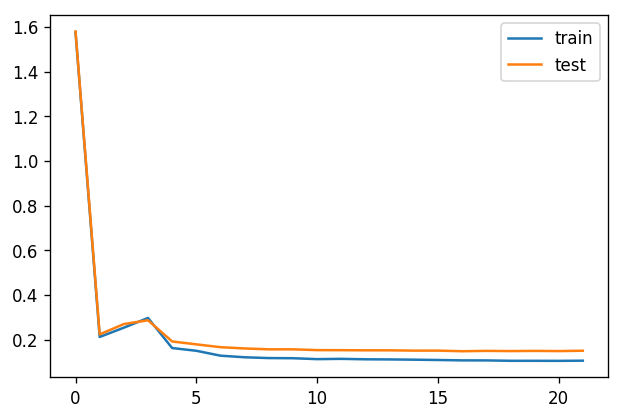

Test loss: 0.149975
5-fold validation: Avg train loss: 0.107583, Avg test loss: 0.133484


In [88]:
train_loss, test_loss = k_fold_cross_valid(k, epochs, verbose_epoch, X_train,
                                           y_train, learning_rate, weight_decay)
print("%d-fold validation: Avg train loss: %f, Avg test loss: %f" %
      (k, train_loss, test_loss))

In [26]:
def learn(epochs, verbose_epoch, X_train, y_train, test, learning_rate,
          weight_decay):
    net = get_net()
    train(net, X_train, y_train, None, None, epochs, verbose_epoch,
          learning_rate, weight_decay)
    preds = net(X_test).asnumpy()
    print(preds)
    test['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
    submission.to_csv('./data/submission.csv', index=False)

In [28]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Epoch 16, train loss: 0.110703
Epoch 17, train loss: 0.108877
Epoch 18, train loss: 0.111482
Epoch 19, train loss: 0.107675
Epoch 20, train loss: 0.112200
Epoch 21, train loss: 0.109022


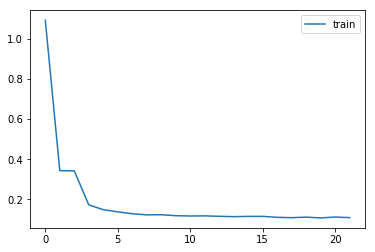

[[103504.445]
 [151730.53 ]
 [176235.62 ]
 ...
 [165710.77 ]
 [107631.125]
 [228932.27 ]]


In [29]:
learn(epochs, verbose_epoch, X_train, y_train, test_set, learning_rate,
      weight_decay)

In [30]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,103504.445312
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,151730.531250
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,176235.625000
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,188505.515625
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,182453.109375


**another try**

In [59]:
y_train_log = np.log1p(train_set.SalePrice.as_matrix())
y_train_log = nd.array(y_train_log)
y_train_log.reshape((num_train,1))


[[12.247699]
 [12.109016]
 [12.317171]
 ...
 [12.493134]
 [11.86447 ]
 [11.90159 ]]
<NDArray 1460x1 @cpu(0)>

In [60]:
def get_rmse(net, X_train, y_train_log):
    num_train = X_train.shape[0]
    y_preds_log = net(X_train)
    return np.sqrt(2 * nd.sum(square_loss(y_preds_log, y_train_log)).asscalar() / num_train)

In [61]:
def train_log(net, X_train, y_train, X_test, y_test, epochs,
          verbose_epoch, learning_rate, weight_decay):
    train_loss = []
    if X_test is not None:
        test_loss = []
    batch_size = 100
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size,shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': learning_rate,
                             'wd': weight_decay})
    net.collect_params().initialize(force_reinit=True)
    for epoch in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)

            cur_train_loss = get_rmse(net, X_train, y_train)
        if epoch > verbose_epoch:
            print("Epoch %d, train loss: %f" % (epoch, cur_train_loss))
        train_loss.append(cur_train_loss)
        if X_test is not None:
            cur_test_loss = get_rmse(net, X_test, y_test)
            test_loss.append(cur_test_loss)
    plt.plot(train_loss)
    plt.legend(['train'])
    if X_test is not None:
        plt.plot(test_loss)
        plt.legend(['train','test'])
    plt.show()
    if X_test is not None:
        return cur_train_loss, cur_test_loss
    else:
        return cur_train_loss

In [62]:
def k_fold_cross_valid_log(k, epochs, verbose_epoch, X_train, y_train,
                       learning_rate, weight_decay):
    assert k > 1
    fold_size = X_train.shape[0] // k
    train_loss_sum = 0.0
    test_loss_sum = 0.0
    for test_i in range(k):
        X_val_test = X_train[test_i * fold_size: (test_i + 1) * fold_size, :]
        y_val_test = y_train[test_i * fold_size: (test_i + 1) * fold_size]

        val_train_defined = False
        for i in range(k):
            if i != test_i:
                X_cur_fold = X_train[i * fold_size: (i + 1) * fold_size, :]
                y_cur_fold = y_train[i * fold_size: (i + 1) * fold_size]
                if not val_train_defined:
                    X_val_train = X_cur_fold
                    y_val_train = y_cur_fold
                    val_train_defined = True
                else:
                    X_val_train = nd.concat(X_val_train, X_cur_fold, dim=0)
                    y_val_train = nd.concat(y_val_train, y_cur_fold, dim=0)
        net = get_net_log()
        train_loss, test_loss = train_log(
            net, X_val_train, y_val_train, X_val_test, y_val_test,
            epochs, verbose_epoch, learning_rate, weight_decay)
        train_loss_sum += train_loss
        print("Test loss: %f" % test_loss)
        test_loss_sum += test_loss
    return train_loss_sum / k, test_loss_sum / k

In [63]:
# liner regression
def get_net_log():
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(256, activation="relu"))
        net.add(gluon.nn.Dense(1))
    net.initialize()
    return net

In [64]:
k = 2
epochs = 50
verbose_epoch = 40
learning_rate = 0.001
weight_decay = 0.0025

Epoch 41, train loss: 0.123741
Epoch 42, train loss: 0.123023
Epoch 43, train loss: 0.122764
Epoch 44, train loss: 0.121928
Epoch 45, train loss: 0.121354
Epoch 46, train loss: 0.121009
Epoch 47, train loss: 0.120545
Epoch 48, train loss: 0.119840
Epoch 49, train loss: 0.119511


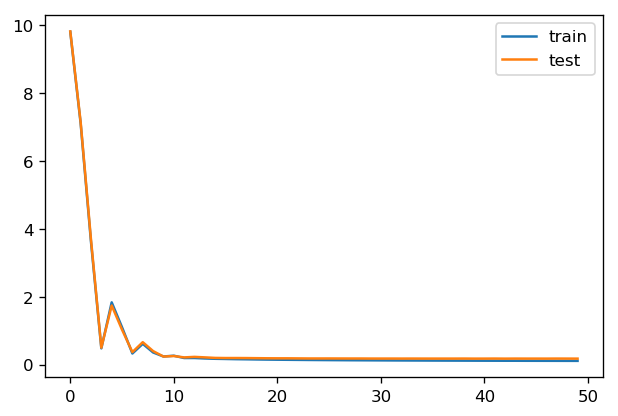

Test loss: 0.185129
Epoch 41, train loss: 0.135849
Epoch 42, train loss: 0.135162
Epoch 43, train loss: 0.134470
Epoch 44, train loss: 0.133739
Epoch 45, train loss: 0.133108
Epoch 46, train loss: 0.132453
Epoch 47, train loss: 0.131870
Epoch 48, train loss: 0.131567
Epoch 49, train loss: 0.130777


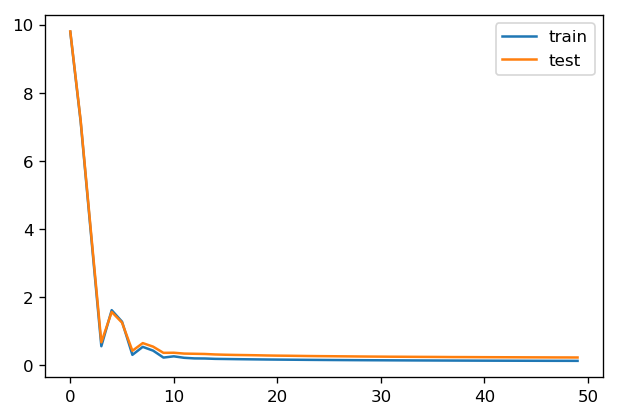

Test loss: 0.229688
2-fold validation: Avg train loss: 0.125144, Avg test loss: 0.207408


In [65]:
train_loss, test_loss = k_fold_cross_valid_log(k, epochs, verbose_epoch, X_train,
                                           y_train_log, learning_rate, weight_decay)
print("%d-fold validation: Avg train loss: %f, Avg test loss: %f" %
      (k, train_loss, test_loss))

In [66]:
def learn_log(epochs, verbose_epoch, X_train, y_train, test, learning_rate,
          weight_decay):
    net = get_net()
    train_log(net, X_train, y_train, None, None, epochs, verbose_epoch,
          learning_rate, weight_decay)
    preds_temp = net(X_test).asnumpy()
    preds = np.expm1(preds_temp)
    print(preds_temp)
    print(preds)
    test['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
    submission.to_csv('./data/submission.csv', index=False)

Epoch 41, train loss: 0.151192
Epoch 42, train loss: 0.145700
Epoch 43, train loss: 0.126609
Epoch 44, train loss: 0.131877
Epoch 45, train loss: 0.142012
Epoch 46, train loss: 0.152193
Epoch 47, train loss: 0.127366
Epoch 48, train loss: 0.168660
Epoch 49, train loss: 0.143127


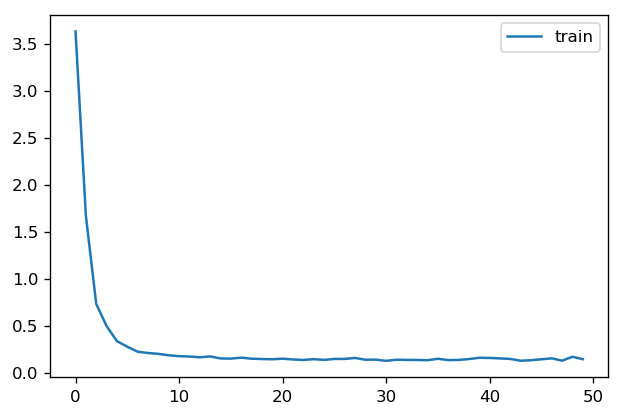

[[11.6054945]
 [11.565275 ]
 [12.13047  ]
 ...
 [12.254351 ]
 [11.602494 ]
 [12.371754 ]]
[[109697.89]
 [105373.42]
 [185435.97]
 ...
 [209891.47]
 [109369.26]
 [236038.33]]


In [67]:
learn_log(epochs, verbose_epoch, X_train, y_train_log, test_set, learning_rate,
      weight_decay)